In [1]:
import os, sys
import warnings
warnings.filterwarnings('ignore')
from cellProcessing_single_WS import *
import dask.array as da
import numpy as np
import matplotlib.pyplot as plt

dir_root = '/nrs/ahrens/jing/giving_up/20190430/fish01/6dpf_HuC-GCaMP7ff-GFAP-RGECO_GU-slow-fwd_fish01_exp01_20190430_174349/im'
save_root = '/nrs/ahrens/Ziqiang/Jing_Glia_project/Processed_data/20190430/fish01/6dpf_HuC-GCaMP7ff-GFAP-RGECO_GU-slow-fwd_fish01_exp01_20190430_174349/'

In [2]:
dask_tmp = '/opt/data/weiz/dask-worker-space'
memory_limit = 0 # unlimited

if not os.path.exists(save_root):
    os.makedirs(save_root)

nsplit = (16, 32)
baseline_percentile = 20
baseline_window = 1000   # number of frames
cameraNoiseMat = '/nrs/ahrens/ahrenslab/Ziqiang/gainMat/gainMat20180208'

In [3]:
# default_mask(dir_root, save_root, dask_tmp=dask_tmp, memory_limit=memory_limit)

Scheduler: inproc://10.150.100.212/5556/1
Dashboard link: http://10.150.100.212/5556/1:40291/status
Compute default mask ---


In [5]:
# Y_d = da.from_zarr(f'{save_root}/Y_ave.zarr')
# np.save(f'{save_root}/Y_ave', Y_d.compute())
Y_d = np.load(f'{save_root}/Y_ave.npy')
Y_d_max = Y_d.max(axis=0, keepdims=True)

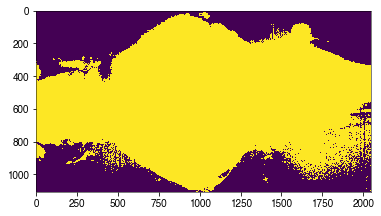

In [7]:
max_ = np.percentile(Y_d_max, 35)
mask_ = Y_d_max>max_
mask_ = np.repeat(mask_, Y_d.shape[0], axis=0)
mask_ = da.from_array(mask_, chunks=(1, Y_d.shape[1]//nsplit[0], Y_d.shape[2]//nsplit[1], -1))
plt.imshow(mask_[0].squeeze())
plt.show()

In [8]:
mask_

,Array,Chunk
Bytes,47.65 MB,4.42 kB
Shape,"(21, 1108, 2048, 1)","(1, 69, 64, 1)"
Count,11425 Tasks,11424 Chunks
Type,bool,numpy.ndarray


In [10]:
print('========================')
print('DF/F computation')
compute_cell_dff_raw(save_root, mask_, dask_tmp=dask_tmp, memory_limit=0)
combine_dff(save_root)

DF/F computation
Scheduler: inproc://10.150.100.212/62994/8
Dashboard link: http://10.150.100.212/62994/8:37252/status


distributed.worker - WARNING -  Compute Failed
Function:  subgraph_callable
args:      (array([[[[18.301798 , 19.560638 , 18.694616 , ..., 17.140457 ,
          11.875692 , 12.048208 ],
         [18.950884 , 21.207062 , 18.984663 , ..., 16.384644 ,
          13.987892 , 11.855762 ],
         [20.47446  , 20.563524 , 18.352507 , ..., 16.385021 ,
          15.349487 , 13.907269 ],
         ...,
         [11.398908 , 12.139481 , 14.461189 , ..., 16.469048 ,
          15.177841 , 16.139349 ],
         [11.508775 , 12.739605 , 13.333816 , ..., 15.661303 ,
          14.5137615, 14.616492 ],
         [13.15331  , 12.827195 , 15.3394985, ..., 14.96052  ,
          14.790508 , 13.293991 ]],

        [[17.686047 , 18.582283 , 18.574636 , ..., 17.410448 ,
          11.346542 ,  8.904832 ],
         [18.45352  , 20.675995 , 17.91424  , ..., 16.080511 ,
          12.976398 , 10.279983 ],
         [20.069096 , 20.547787 , 17.475496 , ..., 15.571762 ,
          13.679412 , 14.125181 ],
         ...,


NameError: name 'block_dF' is not defined